# **Actividad 2**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Punto 1**

In [2]:
def formula_cuadratica (a, b, c):
    # Calculamos las posibles soluciones usando la fórmula cuadrática
    t1 = (-b + (b**2 - 4*a*c)**(0.5)) / (2*a)
    t2 = (-b - (b**2 - 4*a*c)**(0.5)) / (2*a)

    # Calculamos el discriminante para determinar el tipo de soluciones
    discriminante = b**2 - 4*a*c

    if discriminante < 0:
        # Si el discriminante es negativo, no hay soluciones reales
        return "No hay soluciones reales"
    else:
        # Verificamos si alguna de las raíces es positiva
        if t1 > 0:
            return t1
        elif t2 > 0:
            return t2
        else:
            # Si ambas raíces son negativas, lo indicamos
            return "Las raíces son negativas"

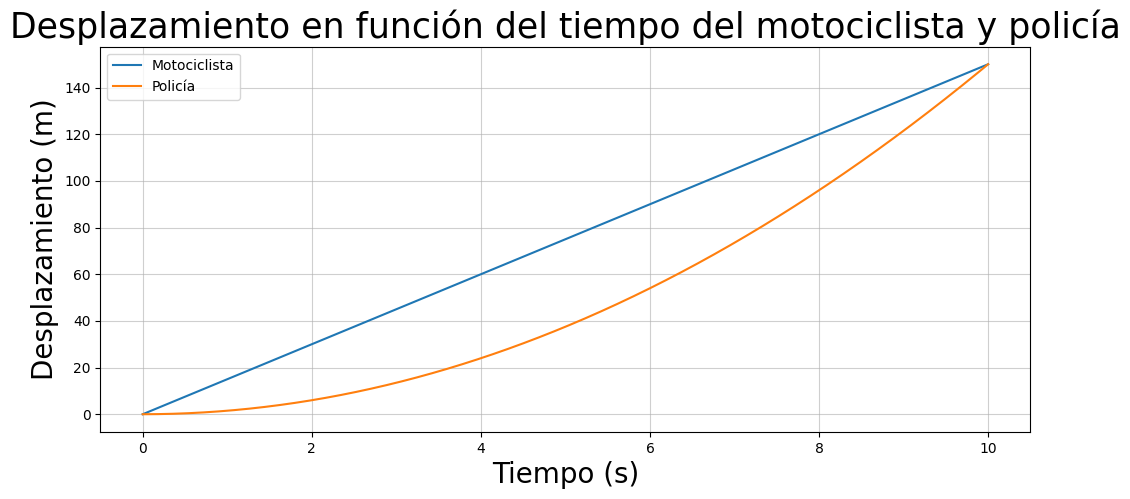

El instante t en el cual ambos se cruzan es t=10.0 segundos


In [3]:
# Definimos las condiciones iniciales
v_motociclista = 15    # Velocidad constante del motociclista en m/s
a_policia = 3          # Aceleración constante del policía en m/s^2
v0_policia = 0         # Velocidad inicial del policía en m/s
xi = 0                 # Posición inicial de ambos en m

# Definimos las funciones de movimiento
def x_mru(xi, v_media, t):
    """Calcula la posición en movimiento rectilíneo uniforme (MRU)."""
    xf = xi + v_media * t
    return xf

def x_mrua(xi, vo, ac, t):
    """Calcula la posición en movimiento rectilíneo uniformemente acelerado (MRUA)."""
    xf = xi + vo * t + 0.5 * ac * (t**2)
    return xf

# Calculamos el instante de cruce resolviendo la ecuación cuadrática
# La ecuación del encuentro es: x_motociclista = x_policia
# Esto nos da la ecuación: 0.5 * a_policia * t^2 - v_motociclista * t = 0
# La forma cuadrática es: a*t^2 + b*t + c = 0
c = 0
b = -v_motociclista
a = 0.5 * a_policia
t_final = formula_cuadratica(a, b, c)  # Resolvemos la ecuación cuadrática

# Generamos valores de tiempo para graficar el movimiento
t = np.linspace(0, t_final, 1000)

# Creamos la figura para la visualización
fig = plt.figure(figsize=(12, 5))

# Graficamos la posición del motociclista usando MRU
plt.plot(t, x_mru(xi, v_motociclista, t), label="Motociclista")

# Graficamos la posición del policía usando MRUA
plt.plot(t, x_mrua(xi, v0_policia, a_policia, t), label="Policía")

# Configuración del gráfico
plt.xlabel("Tiempo (s)", fontsize=20)
plt.ylabel("Desplazamiento (m)", fontsize=20)
plt.title("Desplazamiento en función del tiempo del motociclista y policía", fontsize=25)
plt.grid(alpha=0.6)
plt.legend()

# Mostramos la gráfica
plt.show()

# Imprimimos el instante en que se cruzan
print(f"El instante t en el cual ambos se cruzan es t={t_final} segundos")

## **Punto 2**

**A**. Escriba una función para encontrar modelar el potencial LJ

In [4]:
# a. Escriba una función para encontrar modelar el potencial LJ
def potencial_LJ (ϵ,σ,r):
  """
  Determina el potencial de Lennard-Jones donde:
  V es el potencial en función de la distancia interatómica r.
  ϵ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
  σ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
  r es la distancia entre las dos partículas.
  Y retorna v(r)

  """
  V=4*ϵ*((σ/r)**12 -(σ/r)**6) #se determina el potencial en función de r
  return V #se regresa el potencial.

**B**. Usando σ=ϵ=1 demuestre que la distancia de equilibrio rm es aproximadamente rm=21/6σ. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en rc=2.5σ.

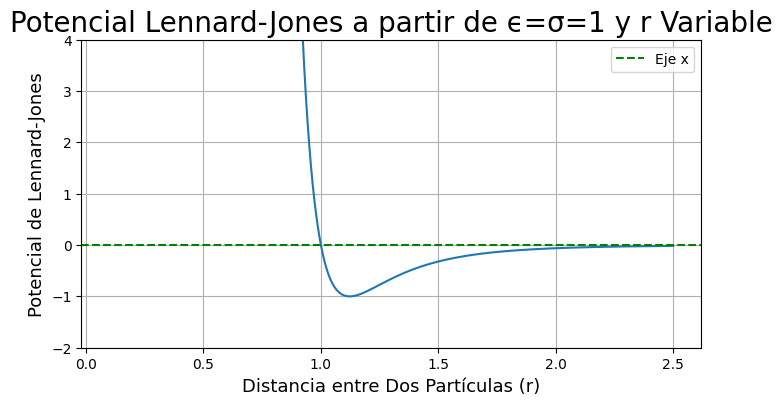

In [5]:
ϵ=1
σ=1
rm=2.5*σ
r=np.linspace(0.1,rm, 1000)
fig=plt.figure(figsize=(8,4))
plt.plot(r,potencial_LJ(ϵ,σ,r))
plt.title("Potencial Lennard-Jones a partir de ϵ=σ=1 y r Variable",fontsize=20)
plt.xlabel("Distancia entre Dos Partículas (r)", fontsize=13)
plt.ylabel("Potencial de Lennard-Jones", fontsize=13)
plt.axhline(0, color="green", linestyle="--",label="Eje x")
plt.grid(0.6)
plt.ylim(-2,4)
plt.legend()
plt.show()

**C**. Verifique que rm=(2^(1/6))*σ se cumple para diferentes valores de σ, dejando ϵ constante.

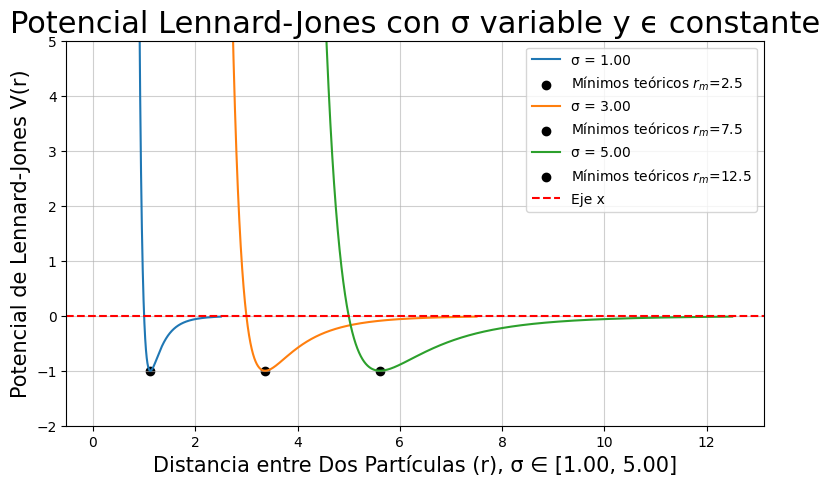

In [6]:
σ=np.linspace(1, 5, 3)
ϵ=1
fig=plt.figure(figsize=(9,5))
for sigma in σ:
  rm=2.5*sigma
  r = np.linspace(0.1, rm, 10000)  # Se genera r dinámicamente por cada sigma

    # Graficar el potencial de Lennard-Jones
  plt.plot(r, potencial_LJ(ϵ, sigma, r), label=f"σ = {sigma:.2f}")

    # Calcular y marcar el mínimo teórico
  r_teorico = (2**(1/6)) * sigma
  plt.scatter(r_teorico, potencial_LJ(ϵ, sigma, r_teorico), color="black", marker="o",label=f"Mínimos teóricos $r_m$={rm}")

# Etiquetas y título
plt.title("Potencial Lennard-Jones con σ variable y ϵ constante", fontsize=22)
plt.xlabel(f"Distancia entre Dos Partículas (r), σ ∈ [{σ.min():.2f}, {σ.max():.2f}]", fontsize=15)
plt.ylabel("Potencial de Lennard-Jones V(r)", fontsize=15)
plt.grid(alpha=0.6)
plt.ylim(-2, 5)  # Ajusta el rango para que los puntos pequeños no desaparezcan
plt.axhline(0,color="red", linestyle="--", label="Eje x")
plt.legend()
plt.show()

# **Punto 3**

In [8]:
# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[0]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

In [9]:
alturas

,Unnamed: 0,Country,"Average Height, Boys, 19 yo (cm)↓",Girls 19 (cm),Boys 19 (in),Girls 19 (in)
0,NaN,Netherlands,184,170,6 ft.,5 ft. 7 in.
1,NaN,Montenegro,183,170,6 ft.,5 ft. 7 in.
2,NaN,Estonia,183,169,6 ft.,5 ft. 6 in.
3,NaN,Bosnia and Herzegovina,182,167,6 ft.,5 ft. 6 in.
4,NaN,Iceland,182,169,6 ft.,5 ft. 7 in.
...,...,...,...,...,...,...
191,NaN,Papua New Guinea,163,157,5 ft. 4 in.,5 ft. 2 in.
192,NaN,Solomon Islands,163,157,5 ft. 4 in.,5 ft. 2 in.
193,NaN,Laos,163,153,5 ft. 4 in.,5 ft.
194,NaN,Timor-Leste,160,153,5 ft. 3 in.,5 ft.


**A**. Limpie los datos, eliminando columnas en (in) y cambie todos los nombres de las columnas al español.

In [10]:
alturas_cm=alturas.copy()
alturas_cm = alturas_cm.drop(columns=["Boys 19 (in)", "Girls 19 (in)"])
alturas_cm = alturas_cm.rename(columns={"Unnamed: 0": "Sin nombre: 0", "Country":"País", "Average Height, Boys, 19 yo (cm)↓" : "Altura Promedio de Hombres (cm)", "Girls 19 (cm)":"Mujeres 19 (cm)"})
alturas_cm

,Sin nombre: 0,País,Altura Promedio de Hombres (cm),Mujeres 19 (cm)
0,NaN,Netherlands,184,170
1,NaN,Montenegro,183,170
2,NaN,Estonia,183,169
3,NaN,Bosnia and Herzegovina,182,167
4,NaN,Iceland,182,169
...,...,...,...,...
191,NaN,Papua New Guinea,163,157
192,NaN,Solomon Islands,163,157
193,NaN,Laos,163,153
194,NaN,Timor-Leste,160,153


In [11]:
alturas_ordenadas=alturas_cm.sort_values(by="Altura Promedio de Hombres (cm)",ascending=False)
alturas_ordenadas=alturas_cm.sort_values(by="Altura Promedio de Hombres (cm)",ascending=False)
mayor_altura=alturas_ordenadas.head(10)
menor_altura=alturas_ordenadas.tail(10)
colombia=alturas_cm[alturas_cm["País"]=="Colombia"]
alturas_filtradas=pd.concat([mayor_altura,menor_altura,colombia])

In [12]:
alturas_filtradas

,Sin nombre: 0,País,Altura Promedio de Hombres (cm),Mujeres 19 (cm)
0,NaN,Netherlands,184,170
1,NaN,Montenegro,183,170
2,NaN,Estonia,183,169
3,NaN,Bosnia and Herzegovina,182,167
4,NaN,Iceland,182,169
5,NaN,Denmark,182,169
6,NaN,Czech Republic,181,168
7,NaN,Latvia,181,169
8,NaN,Slovakia,181,167
9,NaN,Ukraine,181,167


**B** Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños (cm) y niñas (cm) en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

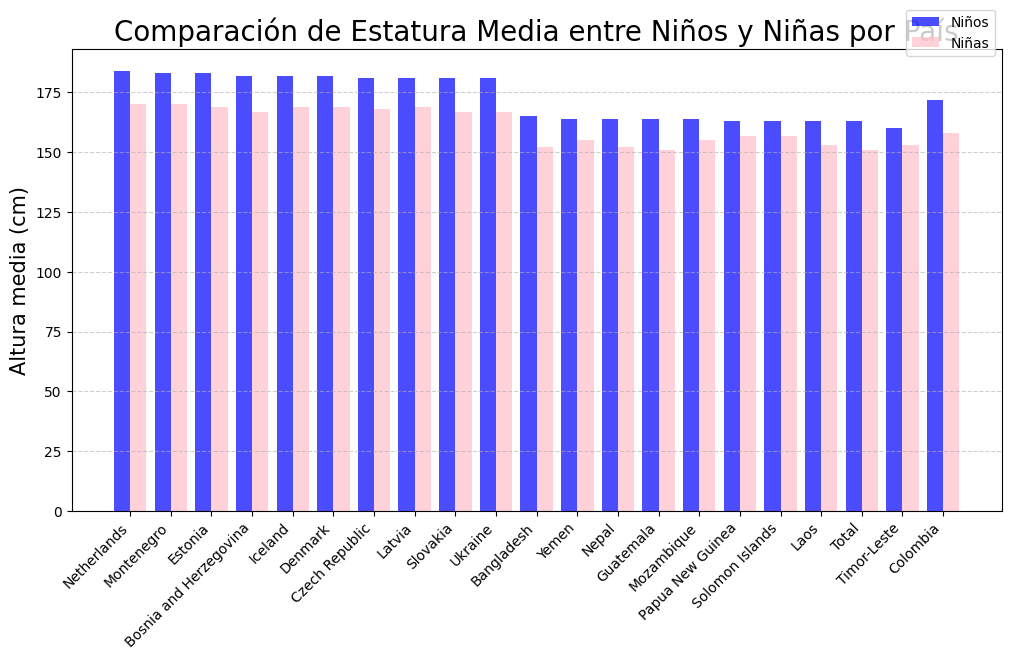

In [13]:
# Definir posición de las barras
x = np.arange(len(alturas_filtradas["País"]))
width = 0.4  # Ancho de barras

# Crear gráfico
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, alturas_filtradas["Altura Promedio de Hombres (cm)"], width, label="Niños", color="blue", alpha=0.7)
ax.bar(x + width/2, alturas_filtradas["Mujeres 19 (cm)"], width, label="Niñas", color="pink", alpha=0.7)

# Mejorar etiquetas y visualización
plt.xticks(x, alturas_filtradas["País"], rotation=45, ha="right")
plt.ylabel("Altura media (cm)", fontsize=15)
plt.title("Comparación de Estatura Media entre Niños y Niñas por País",fontsize=20)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(loc="upper right", bbox_to_anchor=(1, 1.1))  # Mueve la leyenda un poco más arriba
# Mostrar gráfico
plt.show()

**C**. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset income, haga un merge con el dataset alturas. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación

In [14]:
alturas

,Unnamed: 0,Country,"Average Height, Boys, 19 yo (cm)↓",Girls 19 (cm),Boys 19 (in),Girls 19 (in)
0,NaN,Netherlands,184,170,6 ft.,5 ft. 7 in.
1,NaN,Montenegro,183,170,6 ft.,5 ft. 7 in.
2,NaN,Estonia,183,169,6 ft.,5 ft. 6 in.
3,NaN,Bosnia and Herzegovina,182,167,6 ft.,5 ft. 6 in.
4,NaN,Iceland,182,169,6 ft.,5 ft. 7 in.
...,...,...,...,...,...,...
191,NaN,Papua New Guinea,163,157,5 ft. 4 in.,5 ft. 2 in.
192,NaN,Solomon Islands,163,157,5 ft. 4 in.,5 ft. 2 in.
193,NaN,Laos,163,153,5 ft. 4 in.,5 ft.
194,NaN,Timor-Leste,160,153,5 ft. 3 in.,5 ft.


In [15]:
income

,Unnamed: 0,Country,Wealth per Adult 2022↓,GDP per Adult 2022,Total Wealth 2022,Share of World Wealth 2022
0,NaN,Switzerland,"$685,226","$120,431",$4.8T,1.1%
1,NaN,Luxembourg,"$585,950","$163,432",$299B,0.1%
2,NaN,United States,"$551,347","$100,380",$139.9T,30.8%
3,NaN,Hong Kong,"$551,194","$57,168",$3.5T,0.8%
4,NaN,Iceland,"$498,290","$102,597",$129B,NaN
...,...,...,...,...,...,...
215,NaN,Anguilla,NaN,"$32,835",NaN,NaN
216,NaN,Cook Islands,NaN,"$29,907",NaN,NaN
217,NaN,Nauru,NaN,"$23,044",NaN,NaN
218,NaN,Tuvalu,NaN,"$7,773",NaN,NaN


In [16]:
data=pd.merge(alturas, income, on="Country")